Importing the required Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extracting data from CSV files and converting to Data Frames

In [19]:
data_nifty50 = pd.read_csv('nifty50.csv')
data_niftyBank = pd.read_csv('nifty_bank.csv')
data_niftyIT = pd.read_csv('nifty_it.csv')
data_niftyMid = pd.read_csv('nifty_mid.csv')
data_niftyCPSE = pd.read_csv('nifty_cpse.csv')

nifty50_df = pd.DataFrame(data_nifty50)
niftyBank_df = pd.DataFrame(data_niftyBank)
niftyIT_df = pd.DataFrame(data_niftyIT)
niftyMid_df = pd.DataFrame(data_niftyMid)
niftyCPSE_df = pd.DataFrame(data_niftyCPSE)

Checking the columns

In [20]:
# nifty50_df.columns
# niftyBank_df.columns
# niftyIT_df.columns
# niftyMid_df.columns
niftyCPSE_df.columns
# All columns are having extra spaces in their names

Index(['Date ', 'Open ', 'High ', 'Low ', 'Close ', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

Removing the extra spaces from the column names

In [21]:
nifty50_df.columns = nifty50_df.columns.str.strip()
niftyBank_df.columns = nifty50_df.columns.str.strip()
niftyIT_df.columns = nifty50_df.columns.str.strip()
niftyMid_df.columns = nifty50_df.columns.str.strip()
niftyCPSE_df.columns = nifty50_df.columns.str.strip()

Checking for Null of NaN values

In [22]:
# nifty50_df.isnull().sum()
# niftyBank_df.isnull().sum()   #Found 1 null values in Shares traded and Turnover
# niftyIT_df.isnull().sum()
# niftyMid_df.isnull().sum()
niftyCPSE_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

Treating the Null values in Bank Nifty

In [23]:
niftyBank_df['Shares Traded'] = niftyBank_df['Shares Traded'].fillna(niftyBank_df['Shares Traded'].median())
niftyBank_df['Turnover (₹ Cr)'] = niftyBank_df['Turnover (₹ Cr)'].fillna(niftyBank_df['Turnover (₹ Cr)'].median())
niftyBank_df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

Checking data types in each column

In [24]:
# nifty50_df.info()
# niftyBank_df.info()
# niftyIT_df.info()
# niftyMid_df.info()
niftyCPSE_df.info()
# In all of these Date is of type object so change the type to date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    248 non-null    int64  
 6   Turnover (₹ Cr)  248 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


Changing the data type of column date to dtype = date

In [25]:
nifty50_df['Date'] = pd.to_datetime(nifty50_df['Date'], format='mixed', dayfirst=True)
niftyBank_df['Date'] = pd.to_datetime(niftyBank_df['Date'], format='mixed', dayfirst=True)
niftyIT_df['Date'] = pd.to_datetime(niftyIT_df['Date'], format='mixed', dayfirst=True)
niftyMid_df['Date'] = pd.to_datetime(niftyMid_df['Date'], format='mixed', dayfirst=True)
niftyCPSE_df['Date'] = pd.to_datetime(niftyCPSE_df['Date'], format='mixed', dayfirst=True)
niftyIT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             248 non-null    datetime64[ns]
 1   Open             248 non-null    float64       
 2   High             248 non-null    float64       
 3   Low              248 non-null    float64       
 4   Close            248 non-null    float64       
 5   Shares Traded    248 non-null    int64         
 6   Turnover (₹ Cr)  248 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


Now setting Date as index of these Data Frames to resample the data with closing price of 1st day of each month to plot the graph

In [26]:
nifty50_df.set_index('Date', inplace=True)
niftyBank_df.set_index('Date', inplace=True)
niftyIT_df.set_index('Date', inplace=True)
niftyMid_df.set_index('Date', inplace=True)
niftyCPSE_df.set_index('Date', inplace=True)

In [27]:
monthly_nifty50_df = nifty50_df.resample('MS').first()
monthly_niftyBank_df = niftyBank_df.resample('MS').first()
monthly_niftyIT_df = niftyIT_df.resample('MS').first()
monthly_niftyMid_df = niftyMid_df.resample('MS').first()
monthly_niftyCPSE_df = niftyCPSE_df.resample('MS').first()

# After resampling and creating new data frames reseting the Index and bringing Date to normal columns
monthly_nifty50_df.reset_index(inplace=True)
monthly_niftyBank_df.reset_index(inplace=True)
monthly_niftyIT_df.reset_index(inplace=True)
monthly_niftyMid_df.reset_index(inplace=True)
monthly_niftyCPSE_df.reset_index(inplace=True)

Plotting the graphs by adding the Indices names column in each data frame and then combining them all

In [28]:
# Adding an identifier column
monthly_nifty50_df['Index'] = 'Nifty'
monthly_niftyBank_df['Index'] = 'Bank Nifty'
monthly_niftyIT_df['Index'] = 'IT'
monthly_niftyMid_df['Index'] = 'Midcap Nifty'
monthly_niftyCPSE_df['Index'] = 'CPSE'

# Combining the Data Frames
combined_df = pd.concat([monthly_nifty50_df, monthly_niftyBank_df, monthly_niftyIT_df, monthly_niftyMid_df, monthly_niftyCPSE_df])

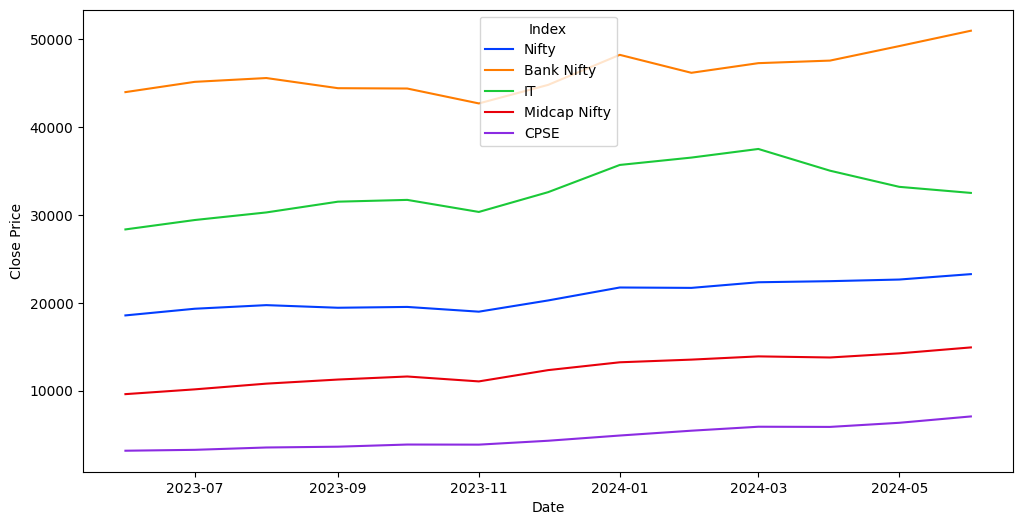

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=combined_df, x='Date', y='Close', hue='Index')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Now Finding the growth in the past year:

In [30]:
indices = combined_df['Index'].unique()
change_data = []
for i in indices:
    index_data = combined_df[combined_df['Index'] == i]
    first = index_data['Close'].iloc[0]
    last = index_data['Close'].iloc[-1]
    change = ((last - first)/first) * 100
    change_data.append([i, change])

# Creating a dataframe of change data
change_df = pd.DataFrame(change_data, columns=['Index', 'Percent Change'])
change_df.head()

,Index,Percent Change
0,Nifty,25.321331
1,Bank Nifty,15.892496
2,IT,14.656846
3,Midcap Nifty,55.430078
4,CPSE,123.708727


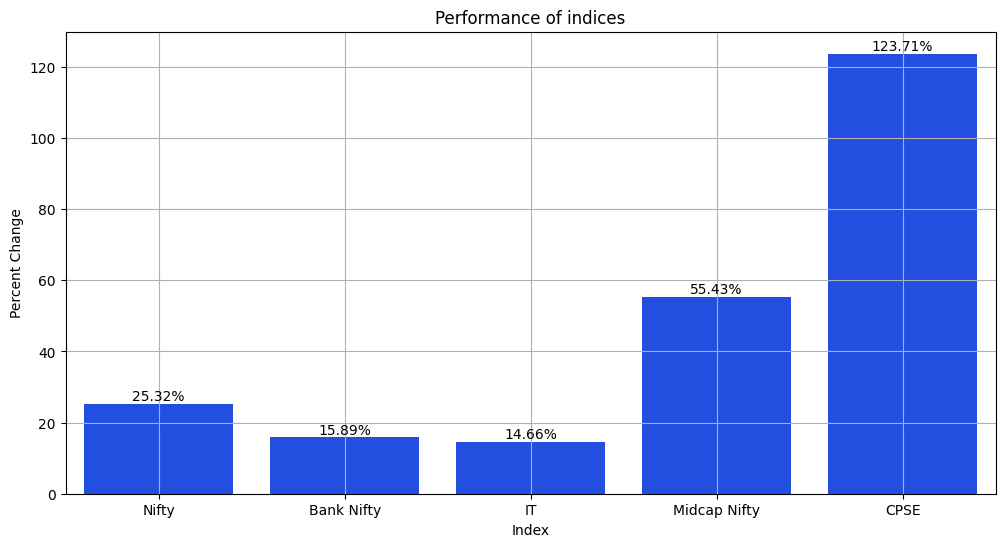

In [31]:
# Plotting the graph of change
plt.figure(figsize=(12,6))
sns.set_palette('bright')
barplot = sns.barplot(data=change_df, x='Index', y='Percent Change')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%0.2f%%')
plt.title('Performance of indices')
plt.xlabel('Index')
plt.ylabel('Percent Change')
plt.grid(True)
plt.show()

Calculating the Standard deviation to find out which index was more volatile and which index gave more consistent returns in the past year:

In [32]:
monthly_nifty50_df['Monthly Returns'] = monthly_nifty50_df['Close'].pct_change()*100
monthly_niftyBank_df['Monthly Returns'] = monthly_niftyBank_df['Close'].pct_change()*100
monthly_niftyIT_df['Monthly Returns'] = monthly_niftyIT_df['Close'].pct_change()*100
monthly_niftyMid_df['Monthly Returns'] = monthly_niftyMid_df['Close'].pct_change()*100
monthly_niftyCPSE_df['Monthly Returns'] = monthly_niftyCPSE_df['Close'].pct_change()*100

# Combining the monthly returns added data frames
combined_df = pd.concat([monthly_nifty50_df, monthly_niftyBank_df, monthly_niftyIT_df, monthly_niftyMid_df, monthly_niftyCPSE_df])
# Now removing the few rows of monthly returns containing NaN
combined_df = combined_df.dropna()

# Calculating the standard deviation now
std_dev = combined_df.groupby('Index')['Monthly Returns'].std().reset_index()
std_dev.head()

,Index,Monthly Returns
0,Bank Nifty,3.572473
1,CPSE,4.764892
2,IT,4.980541
3,Midcap Nifty,4.100457
4,Nifty,3.039643


Now plotting the plot for standard deviations:

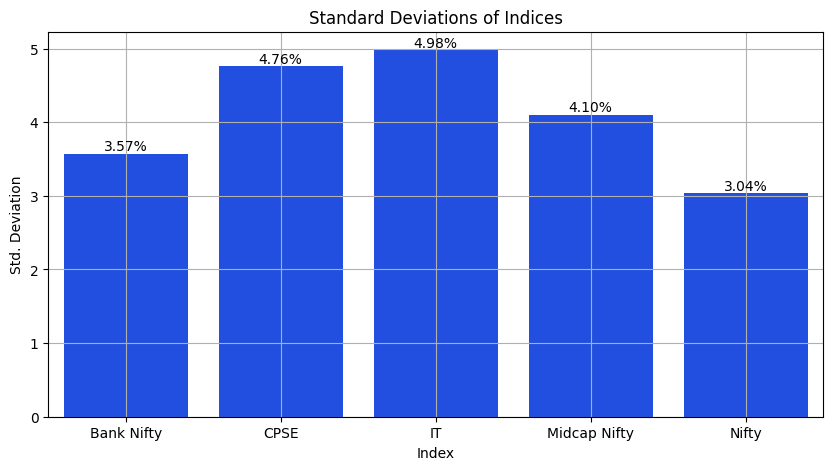

In [33]:
plt.figure(figsize=(10,5))
sns.set_palette('bright')
barplot = sns.barplot(data=std_dev, x='Index', y='Monthly Returns')
for container in barplot.containers:
    barplot.bar_label(container, fmt='%0.2f%%')
plt.title('Standard Deviations of Indices')
plt.xlabel('Index')
plt.ylabel('Std. Deviation')
plt.grid(True)
plt.show()